# About Data 
## Bank Customer Segmentation
Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits., h anasis of customer data.lysis o customer data.

# Analysis Points

1. **Clustering & Segmentation**  
   - Identify popular customer groups with definitions and rules.

2. **Location-wise Trends**  
   - Analyze regional patterns across India.

3. **Transaction Trends**  
   - Discover insights to improve user experience.

4. **RFM Analysis**  
   - Study customer **Recency**, **Frequency**, and **Monetary** behaviors.

5. **Network/Graph Analysis**  
   - Explore customer relationships and interactions.


# 1. Clustering & Segmentation

Clustering groups customers based on shared traits or behaviors using algorithms like **K-Means** or **DBSCAN**.  

#### Key Steps: 
1. **Understand and Clean data**: first we understant & clean the data.  
2. **Choose Features**: Focus on variables like age, spending, or frequency.  
3. **Apply Algorithm**: Group customers into clusters.  
4. **Analyze Segments**: Identify unique characteristics of each group.  

#### Benefits:
- Personalized marketing and offers.  
- Better customer retention.  
- Insights into new or underperforming segments.  

## understanding data

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('training_data/bank_transactions.csv')  # Replace with the actual filename

# Overview of the data
df.info()  # Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


### what the above code is telling us 

- **Total Entries**: 1,048,567  
- **Columns**: 9  
- **Data Types**:  
  - `float64`: 2 columns (e.g., account balance, transaction amount)  
  - `int64`: 1 column (transaction time)  
  - `object`: 6 columns (e.g., IDs, dates, location, gender)  

#### Columns Explanation:
1. **TransactionID**: Unique identifier for each transaction.
2. **CustomerID**: Unique identifier for each customer.
3. **CustomerDOB**: Date of birth of the customer (some missing data becase 1045170 is less then other values same for some other cases). 
4. **CustGender**: Gender of the customer (some missing data).
5. **CustLocation**: Location of the customer (some missing data).
6. **CustAccountBalance**: Balance in the customer’s account (some missing data).
7. **TransactionDate**: Date when the transaction occurred.
8. **TransactionTime**: Time of the transaction (in integer format).
9. **TransactionAmount (INR)**: Amount of money transacted in Indian Rupees.

#### Key Details:
- Columns like `CustomerDOB`, `CustGender`, and `CustAccountBalance` have some missing values.  
- `TransactionID`, `CustomerID`, `TransactionDate`, and `TransactionAmount (INR)` are fully populated. 

In [2]:

#This will ensure that the numbers are displayed without scientific notation 
#and are shown as complete values, such as 1,046,198 instead of 1.046198e+06
pd.options.display.float_format = '{:,.0f}'.format

df.describe()  # Summary statistics for numeric columns


,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,"1,046,198","1,048,567","1,048,567"
mean,"115,404","157,088","1,574"
std,"846,485","51,262","6,575"
min,0,0,0
25%,"4,722","124,030",161
50%,"16,792","164,226",459
75%,"57,657","200,010","1,200"
max,"115,035,495","235,959","1,560,035"


### Dataset Summary Statistics

#### Insights:
- **CustAccountBalance** has a wide range, from 0 to over 115 million.
- **TransactionTime** is recorded as integers, with the majority of transactions occurring in the 124,000 to 235,000 range.
- **TransactionAmount(INR)** shows a typical transaction value around 1,574, with outliers reaching up to 1.56 million.

th outliers reaching up to ₹1.56 million.


In [3]:
df.head(5) # Display the first few rows

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,"17,819",2/8/16,143207,25
1,T2,C2142763,4/4/57,M,JHAJJAR,"2,271",2/8/16,141858,"27,999"
2,T3,C4417068,26/11/96,F,MUMBAI,"17,874",2/8/16,142712,459
3,T4,C5342380,14/9/73,F,MUMBAI,"866,503",2/8/16,142714,"2,060"
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,"6,714",2/8/16,181156,"1,762"


#### Key Information:
- **TransactionID**: Unique identifier for each transaction (e.g., T1, T2).
- **CustomerID**: Unique identifier for each customer (e.g., C5841053).
- **CustomerDOB**: Customer's date of birth (e.g., 10/1/94).
- **CustGender**: Customer's gender (F = Female, M = Male).
- **CustLocation**: Location of the customer (e.g., JAMSHEDPUR, MUMBAI).
- **CustAccountBalance**: The balance in the customer's account (e.g., ₹17,819.05).
- **TransactionDate**: Date the transaction occurred (e.g., 2/8/16).
- **TransactionTime**: Time of the transaction in integer format (e.g., 143207).
- **TransactionAmount (INR)**: The amount transacted in Indian Rupees (e.g., ₹25.0).

This preview provides insight into the structure of the data, with details on customer and transaction attributes.

## Data Cleaning

In [4]:
## Show detailes data set
def check(df):
    list=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        list.append([col,dtypes,nunique,sum_null])
    df_clean_details=pd.DataFrame(list)
    df_clean_details.columns=['column','dtypes','nunique','sum_null']
    return df_clean_details 
    
check(df)

,column,dtypes,nunique,sum_null
0,TransactionID,object,1048567,0
1,CustomerID,object,884265,0
2,CustomerDOB,object,17254,3397
3,CustGender,object,3,1100
4,CustLocation,object,9355,151
5,CustAccountBalance,float64,161328,2369
6,TransactionDate,object,55,0
7,TransactionTime,int64,81918,0
8,TransactionAmount (INR),float64,93024,0


### Data Summary

This dataset contains customer transaction information with the following details:

#### Key Insights:
- **Missing Values**: Some columns have missing values, particularly **CustomerDOB**, **CustGender**, **CustLocation**, and **CustAccountBalance**. These need to be handled by filling in missing data or removing rows with critical missing values.
- **Duplicates**: There may be duplicate rows based on **TransactionID** and **CustomerID**.
- **Data Types**: Some columns (e.g., **TransactionTime**) may need type conversion for consistency.

#### Cleaning Approach:
- Fill missing values with the most frequent or mean values where appropriate.
- Remove duplicates and handle invalid date formats.
- Ensure proper data types for consistency (e.g., converting **TransactionTime** to integer).
- Remove negative transaction amounts as they may represent errors.

### Fill missing values

In [5]:
df.shape

(1048567, 9)

In [6]:
# 1. Handle missing values
df['CustomerDOB'] = df['CustomerDOB'].fillna(df['CustomerDOB'].mode()[0])  # Fill missing DOB with the most frequent value
df['CustGender'] = df['CustGender'].fillna(df['CustGender'].mode()[0])  # Fill missing gender with the most frequent value
df['CustLocation'] = df['CustLocation'].fillna(df['CustLocation'].mode()[0])  # Fill missing location with the most frequent value
df['CustAccountBalance'] = df['CustAccountBalance'].fillna(df['CustAccountBalance'].mean())  # Fill missing balance with mean value


###  Remove duplicate rows based on TransactionID and CustomerID

In [7]:
df = df.drop_duplicates(subset=['TransactionID', 'CustomerID'])

### Remove rows with any remaining missing values in critical columns

In [8]:

df = df.dropna(subset=['CustomerDOB', 'CustGender', 'CustLocation', 'TransactionDate'])
df.shape

(1048567, 9)

###  Converted to `datetime` format, invalid entries become `NaT` and we will remove that easily

In [9]:
# 5. Convert columns to appropriate types
df['TransactionTime'] = df['TransactionTime'].astype(int)  # Ensure TransactionTime is integer


###  Ensure 'TransactionAmount (INR)' is a positive value

In [10]:

df = df[df['TransactionAmount (INR)'] >= 0]  # Remove rows where transaction amount is negative


In [11]:
df['CustGender'].value_counts()

CustGender
M    766630
F    281936
T         1
Name: count, dtype: int64

In [12]:
df.drop(df[df['CustGender']=='T'].index,inplace=True)


In [13]:
# convert type of columns TransactionDate,CustomerDOB from string to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

/tmp/ipykernel_17/276658000.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
/tmp/ipykernel_17/276658000.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


In [14]:
df['CustomerAge'] =df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
df = df[df['CustomerAge'] > 0]
df['CustomerAge'].unique()

array([ 22,  20,  28,  24,  34,  32,  38, 216,  27,  25,  31,  23,  30,
        37,  39,  19,  33,  26,  36,  35,  29,  41,  21,  42,  17,  40,
        12,  18,  16,  14,   9,  15,   3,  13,  11,   6,   5,   7,   1,
        10,   8,   4,   2], dtype=int32)

### remove the outliers


In [15]:
import numpy as np


# Define the columns to check for outliers
columns_to_check = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustomerAge']

# Remove outliers using IQR
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the dataset to remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712856 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            712856 non-null  object        
 1   CustomerID               712856 non-null  object        
 2   CustomerDOB              712856 non-null  datetime64[ns]
 3   CustGender               712856 non-null  object        
 4   CustLocation             712856 non-null  object        
 5   CustAccountBalance       712856 non-null  float64       
 6   TransactionDate          712856 non-null  datetime64[ns]
 7   TransactionTime          712856 non-null  int64         
 8   TransactionAmount (INR)  712856 non-null  float64       
 9   CustomerAge              712856 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(4)
memory usage: 57.1+ MB


In [17]:
# Code to Convert 'CustGender' and 'CustLocation' to Numeric Format

# Converting 'CustGender' to numeric format (F = 0, M = 1)
df['CustGender'] = df['CustGender'].map({'F': 0, 'M': 1})

# Converting 'CustLocation' to numeric format using label encoding
df['CustLocation'] = pd.factorize(df['CustLocation'])[0]


### Conversion of Categorical Columns to Numeric Format

1. **CustGender**: 
   - Originally a categorical column with values **F** (Female) and **M** (Male).
   - Converted to numeric format:
     - **F** (Female) is mapped to **0**.
     - **M** (Male) is mapped to **1**.
   - This conversion helps in numerical analysis or machine learning models.

2. **CustLocation**: 
   - Originally a categorical column with customer location names (e.g., JAMSHEDPUR, MUMBAI).
   - Converted to numeric format using **Label Encoding** where each unique location is assigned a unique integer.
     - **Factorize** function is used to map each location to a unique integer.
   - This makes the location data suitable for machine learning models, where categorical data needs to be represented as numbers.

### Benefits of Conversion:
- **Machine Learning Compatibility**: Algorithms like regression, classification, and clustering require numerical input.
- **Data Consistency**: Numeric values can be more easily processed and analyzed.

In [18]:
# 7. Reset index after cleaning
df.reset_index(drop=True, inplace=True)
df.info()
df['CustomerAge'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712856 entries, 0 to 712855
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            712856 non-null  object        
 1   CustomerID               712856 non-null  object        
 2   CustomerDOB              712856 non-null  datetime64[ns]
 3   CustGender               712856 non-null  int64         
 4   CustLocation             712856 non-null  int64         
 5   CustAccountBalance       712856 non-null  float64       
 6   TransactionDate          712856 non-null  datetime64[ns]
 7   TransactionTime          712856 non-null  int64         
 8   TransactionAmount (INR)  712856 non-null  float64       
 9   CustomerAge              712856 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(3), object(2)
memory usage: 51.7+ MB


array([22, 20, 28, 24, 34, 32, 38, 27, 25, 31, 23, 30, 39, 33, 36, 35, 29,
       26, 41, 21, 42, 37, 17, 19, 40, 18, 16, 15], dtype=int32)

## Feature Engineering Explanation

### 1. Transaction Frequency, Total, and Average per Customer:
- **Purpose**: Helps identify different customer types (e.g., high spenders, frequent users).
- **Usefulness**: 
  - Useful for targeted marketing and personalized services.
  - Helps optimize customer engagement and loyalty programs.

### 2. Recency (Days since last transaction):
- **Purpose**: Measures customer engagement and helps predict churn.
- **Usefulness**:
  - Allows for targeted re-engagement strategies.
  - Identifies customers who are at risk of becoming inactive.

### 3. Age:
- **Purpose**: Provides demographic insights for segmentation.
- **Usefulness**:
  - Helps tailor offers based on customer age groups.
  - Useful for personalizing financial products and services.

### Summary:
- These features enable **customer segmentation**, **targeted marketing**, and improved **customer relationship management**.

In [19]:
from datetime import datetime

# Calculate transaction frequency, total, and average per customer
transaction_summary = df.groupby('CustomerID').agg({
    'TransactionAmount (INR)': ['count', 'sum', 'mean'],
    'TransactionDate': 'max'
}).reset_index()

# Flatten the MultiIndex columns
transaction_summary.columns = ['CustomerID', 'TransactionCount', 'TotalAmount', 'AverageAmount', 'LastTransactionDate']

# Add recency (days since last transaction)
transaction_summary['Recency'] = transaction_summary['LastTransactionDate'].apply(
    lambda date: (datetime.now() - pd.to_datetime(date)).days
)

# You already have CustomerAge column, so use it directly
# No need to calculate Age if it's already in the dataset
transaction_summary['Age'] = df.groupby('CustomerID')['CustomerAge'].first().values



In [20]:
# Check the results
transaction_summary.head(20)

,CustomerID,TransactionCount,TotalAmount,AverageAmount,LastTransactionDate,Recency,Age
0,C1010011,1,356,356,2016-09-08,3009,33
1,C1010012,1,"1,499","1,499",2016-08-14,3034,22
2,C1010014,1,"1,205","1,205",2016-01-08,3253,24
3,C1010018,1,30,30,2016-09-15,3002,26
4,C1010031,2,"1,864",932,2016-04-08,3162,32
5,C1010035,1,50,50,2016-01-08,3253,24
6,C1010038,1,100,100,2016-07-09,3070,24
7,C1010039,1,915,915,2016-02-09,3221,18
8,C1010041,1,20,20,2016-07-09,3070,24
9,C1010045,1,201,201,2016-08-18,3030,29


## Data Preprocessing for Clustering

1. **Feature Selection**:  
   - Select key features for clustering: **Age**, **TransactionCount**, **TotalAmount**, **AverageAmount**, and **Recency**.

2. **Scaling**:  
   - Use **StandardScaler** to standardize the features (mean = 0, standard deviation = 1).
   - Ensures that all features contribute equally to the clustering process.

3. **Why Scaling**:  
   - Clustering algorithms like K-means require features to be on the same scale to avoid bias toward features with larger ranges.

### Benefits:
- **Improves Clustering**: Prevents certain features from dominating the model.
- **Equal Contribution**: Ensures fair comparison between features.


In [21]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = transaction_summary[['Age', 'TransactionCount', 'TotalAmount', 'AverageAmount', 'Recency']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Clustering with KMeans

1. **Determine Optimal Clusters**:
   - We use the **Elbow Method** to determine the optimal number of clusters (k). This involves running KMeans for different values of k (from 1 to 9) and plotting **inertia** (within-cluster sum of squares) to find the "elbow" point where inertia decreases sharply.
   - The **elbow point** indicates the optimal number of clusters.

2. **Elbow Method Plot**:
   - The plot shows inertia vs. the number of clusters, helping identify the best k. In this case, the elbow occurs at **k = 4**, which is chosen as the optimal number of clusters.

3. **Fit KMeans**:
   - We apply **KMeans clustering** with 4 clusters and assign each transaction to a cluster.
   - The **Cluster** column is added to the `transaction_summary` DataFrame, which contains the cluster label for each transaction.

### Benefits:
- **Optimal Clusters**: Using the elbow method helps find the ideal number of clusters for the dataset.
- **Cluster Assignment**: Each data point is grouped into one of the clusters, useful for segmentation and analysis.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

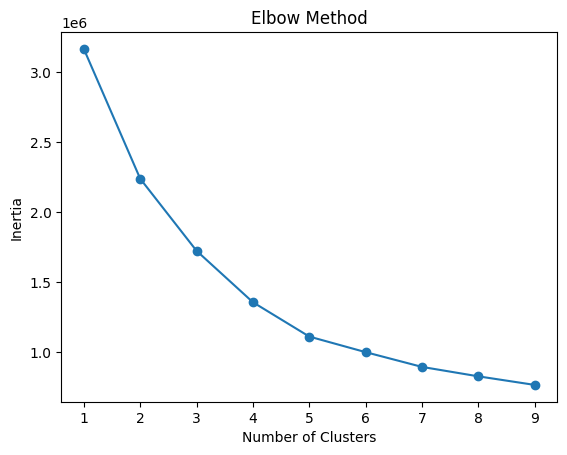

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
# Fit KMeans with optimal number of clusters
optimal_k = 4  # Choose based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
transaction_summary['Cluster'] = kmeans.fit_predict(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Use agg() to get key statistics for each cluster, focusing on a few columns
cluster_summary = transaction_summary.groupby('Cluster').agg({
    'Age': 'mean', 
    'TransactionCount': 'mean', 
    'TotalAmount': 'sum',
    'AverageAmount': 'mean',
    'Recency': 'median'  # Use median for recency instead of mean to reduce outliers
}).reset_index()

print(cluster_summary)

# Add descriptive labels based on cluster indices
cluster_labels = {
    0: 'Young High Spenders',
    1: 'Senior Regulars',
    2: 'Occasional Low Spenders',
    3: 'Urban Frequent Shoppers'
}

transaction_summary['Segment'] = transaction_summary['Cluster'].map(cluster_labels)

   Cluster  Age  TransactionCount  TotalAmount  AverageAmount  Recency
0        0   28                 1   38,342,172            339    3,192
1        1   28                 1   89,975,326            264    3,021
2        2   30                 1  153,825,644          1,394    3,028
3        3   28                 2   70,197,213            472    3,009


### Code Explanation

1. **Aggregate Cluster Statistics**:
   - Group data by `Cluster` and compute:
     - **Age**: Average customer age.
     - **TransactionCount**: Average transactions per cluster.
     - **TotalAmount**: Total spending in each cluster.
     - **AverageAmount**: Mean transaction value.
     - **Recency**: Median days since last transaction (reduces outliers).

2. **Reset Index**:
   - Converts the grouped data back to a standard DataFrame.

3. **Add Descriptive Labels**:
   - Use `cluster_labels` dictionary to assign meaningful names to clusters:
     - e.g., Cluster `0` → **'Young High Spenders'**. demographics.


4. **Update DataFrame**:
   - Map `Cluster` to labels and create a new `S
  
### Cluster Labels Explanation

1. **Young High Spenders** (`0`):
   - Young customers with high transaction amounts.

2. **Senior Regulars** (`1`):
   - Older customers with consistent shopping patterns.

3. **Occasional Low Spenders** (`2`):
   - Customers with infrequent and low transaction amounts.

4. **Urban Frequent Shoppers** (`3`):
   - Urban-based customers with frequent shopping behavior.

These labels describe customer segments based on their shopping habits and demographics.egment` column.

### Purpose
Summarize cluster data and assign descriptive labels for easier interpretation.

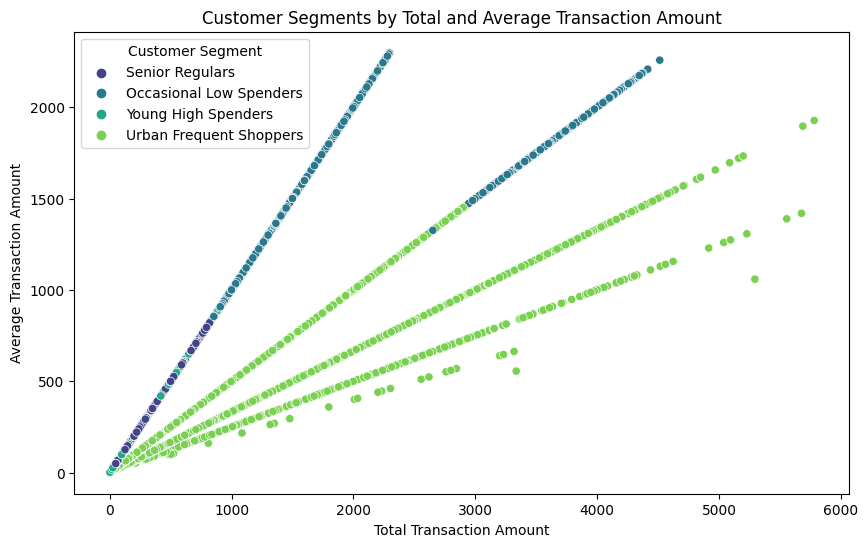

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transaction_summary, x='TotalAmount', y='AverageAmount', hue='Segment', palette='viridis')
plt.title('Customer Segments by Total and Average Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Customer Segment')
plt.show()


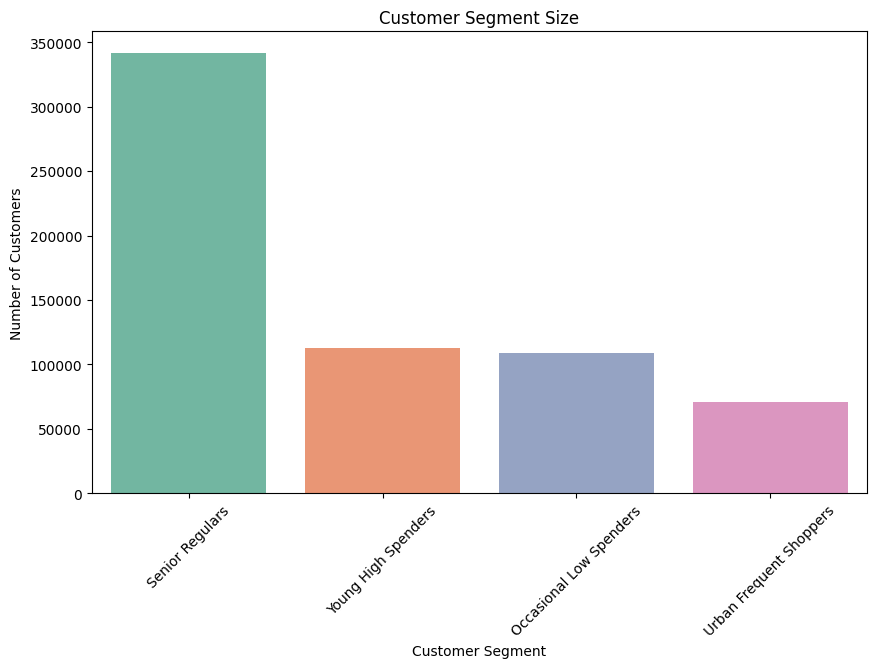

In [26]:
# Bar plot to visualize the size of each segment
segment_size = transaction_summary['Segment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_size.index, y=segment_size.values, palette='Set2')
plt.title('Customer Segment Size')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


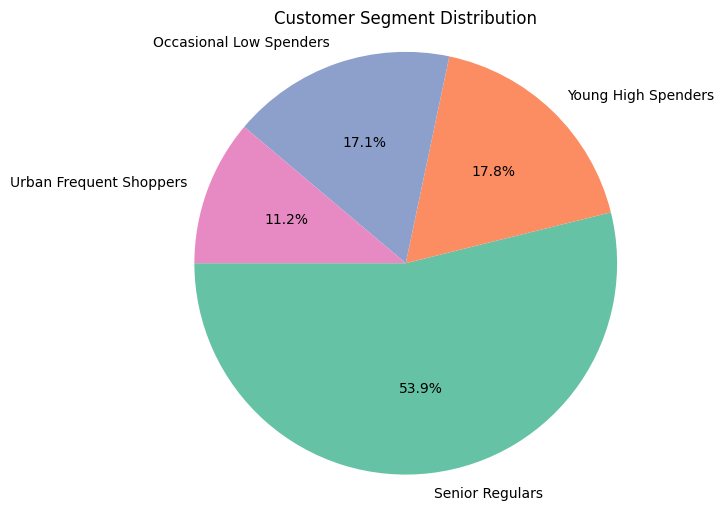

In [27]:
# Pie plot to visualize the proportion of each customer segment
segment_counts = transaction_summary['Segment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('Set2', len(segment_counts)))
plt.title('Customer Segment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import joblib

joblib.dump(kmeans, 'saved_models/kmeans_model.pkl')  # Save the model to a file